this notebook serves as a testing ground for the superoperator formalism

In [1]:
from qutip import *
from qutip import basis as Basis
from qutip_qip import circuit
import numpy as np
from transmon_code.helpers import plot_bloch, generate_basis, disp

In [2]:
# basis = [qeye(2), sigmax(), sigmay(), sigmaz()]
# basis = [i/np.sqrt(2) for i in basis]
# [disp(i) for i in basis]

basis = generate_basis(2)
# basis = [i.unit(norm="fro", inplace=False) for i in basis]
# basis = [basis[0], basis[1], basis[2]/np.sqrt(2), basis[3]/np.sqrt(2)]
[disp(i) for i in basis]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[None, None, None, None]

In [3]:
def Λ(ρ):
    qc = circuit.QubitCircuit(1)
    qc.add_gate("RX", targets=0, arg_value=np.pi/2)
    return qc.run(ρ)

In [4]:
def make_PTM():
    transformed_basis = [Λ(i) for i in basis]

    return Qobj([[np.trace(i*j) for j in transformed_basis] for i in basis])

In [5]:
def to_vec(ρ):

    return Qobj([[np.trace(i*ρ)] for i in basis])

def to_oper(vec):

    return sum([v[0]*basis[i] for i,v in enumerate(vec.full())])

def to_oper(vec):
    return sum([vec.full()[i][0] * basis[i] for i in range(vec.dims[0][0])])

def apply_PTM(PTM, ρ):
    if ρ.isket:
        ρ = ket2dm(ρ)
    
    return to_oper(PTM*to_vec(ρ))

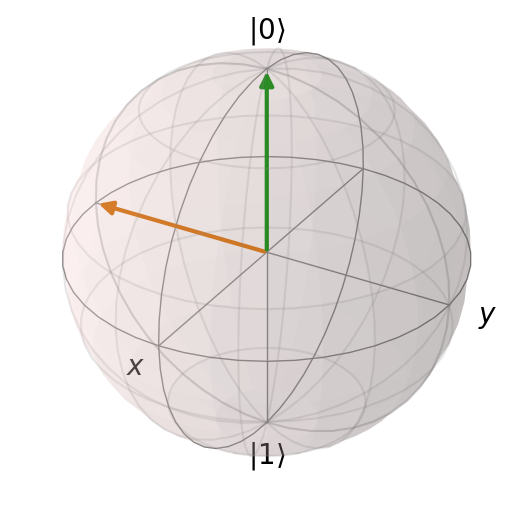

In [6]:
PTM = make_PTM()

init = (Basis(2,0)+0j*Basis(2,1)).unit()
res = apply_PTM(PTM, init)

plot_bloch([init, res])